<a href="https://colab.research.google.com/github/carlotta-marchis/tensorflow/blob/master/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify handwritten digits

For this small project I will use the famous MNIST handwritten digit database, containing 70,000 images of handwritten digits. The aim is to train a neural network model to classify those images.

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

print(tf.__version__)

2.2.0-rc1


## Importing the dataset

Here we import the famous MNIST dataset, which contains 70,000 images of 9 cathegories, i.e. the digits from 0 to 9. Each image is 28 x 28 pixels, for a total of 784 pixels, where each pixel is associated to an integer between 0 and 255, inclusive.

In [0]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* The `X_train` and `y_train` arrays are the **training set** images and labels respectively, which are used to train the model.
* The model is tested against the **test set**, i.e. the `X_test`, and `y_test` arrays.

The following figure shows the first 49 images of the dataset:

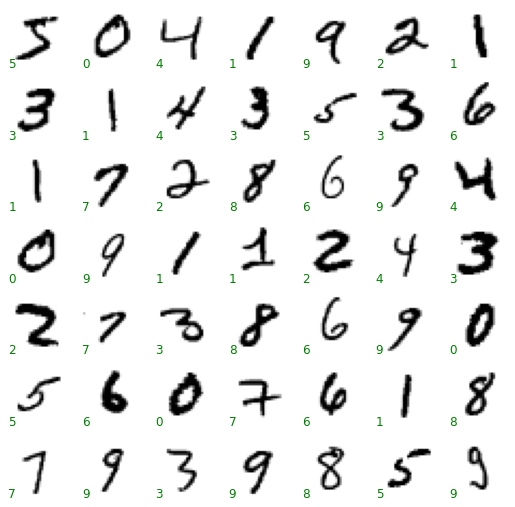

In [0]:
plt.figure(figsize=(9,9))
for i in range(49):
  plt.subplot(7, 7, i+1)
  plt.imshow(X_train[i], cmap='binary')
  plt.text(0,28, y_train[i], color='green')
  plt.xticks([])
  plt.yticks([])
plt.show()

## Exploring the data

As we mentioned above the dataset is splitten into a training set and a test set.

In [0]:
X_train.shape

(60000, 28, 28)

`X_train` containes 60,000 images, each of which is represented as 28 x 28 pixel.

In [0]:
y_train.shape

(60000,)

Likewise there are 60,000 labels in the training set.

In [0]:
print('Each label is an integer between ' + str(y_train.min()) + ' and ' + str(y_train.max()) + '.')

Each label is an integer between 0 and 9.


In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

The test set contains 10,000 28 x 28 images with 10,000 labels.

## Preprocessing the data 

In [0]:
print('Each pixel has a value between 0 and ' + str(X_train[0].max()) + ' inclusive:')

Each pixel has a value between 0 and 255 inclusive:


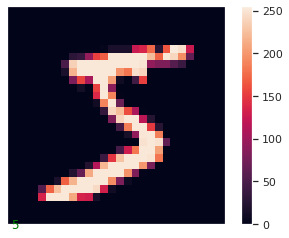

In [0]:
plt.figure()
plt.imshow(X_train[0])
plt.text(0,28, y_train[0], color='green')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

We therefore need to scale these values to a range of 0 and 1 before using them to train a neural network model. The test set has to be preprocessed in the same way.

In [0]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Builing the model

Building the model requires:

- **configuring** the layers of the model
- **compiling** the model.

### Configuring the layers

In [0]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(10)
                          ])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 x 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 

Then the network consists of a sequence of three `tf.keras.layers.Dense` layers. These are **fully connected** neural layers. The first and second Dense layer have 16 nodes (or neurons). The third (and last) layer returns a **logits array** with length of 10.

### Compiling the model

Before training the model we need to compile it by setting three key parameters:
- The **optimizer**. I will use the default Adam gradient-based optimizer. 
- The **loss function**. I will use [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) as the data have more than two integer valued label classes (0 to 9). (*Note: Keras distinguishes between `binary_crossentropy` for 2 classes and `categorical_crossentropy` for more than 2 classes*).
- A list of **metrics**. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training the model

Training the model consists in calling the `model.fit` function and specifying some parameters as:

- The **training data**, which are the images and labels stored in the `X_train` and `y_train` arrays respectively.
- The **number of epochs** (iterations over the entire dataset) to train for.
- The **batch size** (number of samples per gradient update) to use when training.

Here is a useful [link](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) to better understand the meaning of batch size and epochs.

### Feeding the model

In [0]:
model.fit(X_train, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4310 - accuracy: 0.8747
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2351 - accuracy: 0.9320
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2003 - accuracy: 0.9426
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1800 - accuracy: 0.9481
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1666 - accuracy: 0.9516


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.95 (or 95%) on the training data.

### Evaluating the model

In [0]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1777 - accuracy: 0.9477

Test accuracy: 0.947700023651123


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. 

## Making predictions

We can now use the model to make predictions.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits), are vectors of raw (non-normalized) predictions generated by the classification model. When, as in this case, the model is solving a **multi-class classification problem**, logits typically become an input to the **softmax function**. The softmax function then generates a vector of (normalized) probabilities with one value for each possible class.

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(X_test)

`predictions` consists of 10,000 arrays of 10 numbers, representing the probabilities for each sample of belonging to one of the 10 classes (the digits between 0 and 9).

In [0]:
predictions.shape

(10000, 10)

In [0]:
predictions[0]

array([1.3477820e-06, 2.8340958e-09, 6.8881213e-06, 3.0915128e-04,
       1.5118378e-09, 4.5520383e-07, 9.1164821e-14, 9.9963427e-01,
       2.1957635e-06, 4.5759691e-05], dtype=float32)

### Verifying predictions


These two functions will help us visualize the result of the prediction.

In [0]:
def plot_image(i, prediction_arrays, true_labels, imgages):
  predicted_label, true_label, imgage = np.argmax(prediction_arrays[i]), true_labels[i], imgages[i]
  
  plt.grid(False)
  plt.imshow(imgage, cmap='binary')
  plt.xticks([])
  plt.yticks([])

  plt.text(0,28, predicted_label, color='blue' if predicted_label == true_label else 'red')
  

def plot_labels(i, prediction_arrays, true_labels):
  predicted_label, true_label = np.argmax(prediction_arrays[i]), true_labels[i]
  
  plt.grid(False)
  thisplot = plt.bar(range(10), prediction_arrays[i], color="#777777")
  plt.xticks(range(0,10))
  plt.yticks([])
  plt.ylim([0, 1])
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Now, let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red.

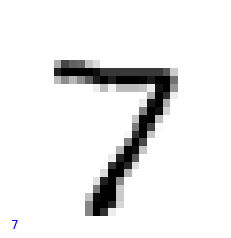

In [0]:
plot_image(0,predictions, y_test, X_test)

The image shows that our model correctly predict the class of the first image.

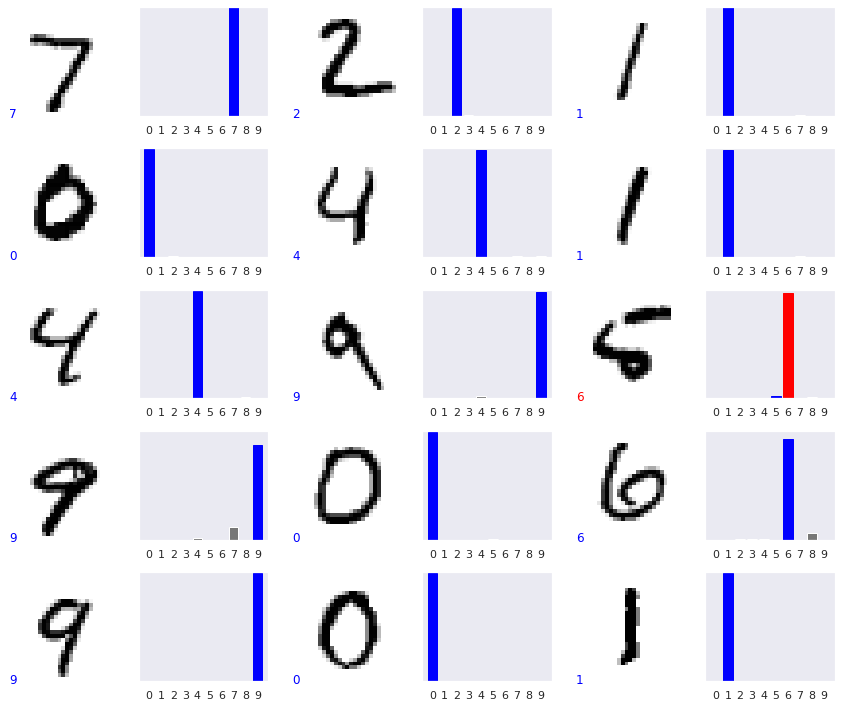

In [0]:
# Plot the first n_row*n_cols test images and the labels probabilities
n_rows = 5
n_cols = 3
n_images = n_rows*n_cols

plt.figure(figsize=(2*2*n_cols,2*n_rows))
for i in range(n_images):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(n_rows, 2*n_cols, 2*i+2)
  plot_predicted_labels(i, predictions, y_test)
plt.tight_layout()
plt.show()

The model mistakenly identifies the 9th image as a 6, while it actually is a 5.

Finally, let's look at the first 15 images the model incorrectly predicts:

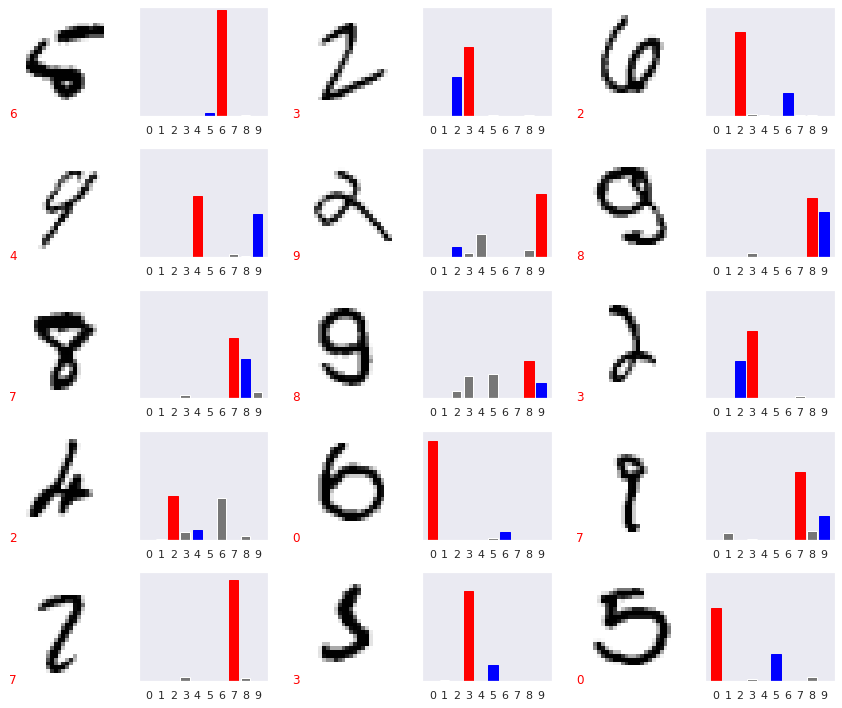

In [0]:
predicted_labels = []

for i in range(len(predictions)):
  predicted_labels.append(np.argmax(predictions[i]))

select_incorrect = ~(predicted_labels == y_test)

incorrect_predictions = predictions[select_incorrect]
incorrect_images = X_test[select_incorrect]
incorrect_labels = y_test[select_incorrect]

# Plot the first n_row*n_cols test images and the labels probabilities
n_rows = 5
n_cols = 3
n_images = n_rows*n_cols

plt.figure(figsize=(2*2*n_cols,2*n_rows))
for i in range(n_images):
  plt.subplot(n_rows, 2*n_cols, 2*i+1)
  plot_image(i, incorrect_predictions, incorrect_labels, incorrect_images)
  plt.subplot(n_rows, 2*n_cols, 2*i+2)
  plot_labels(i, incorrect_predictions, incorrect_labels)
plt.tight_layout()
plt.show()